In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
df = pd.read_csv('russian_demography.csv')
df

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [183]:
df.describe()
df = df.dropna(subset=['npg'])

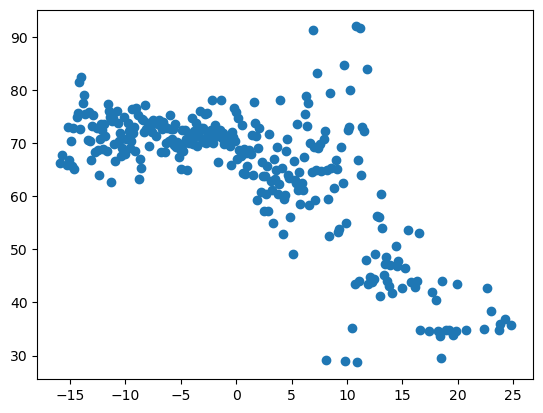

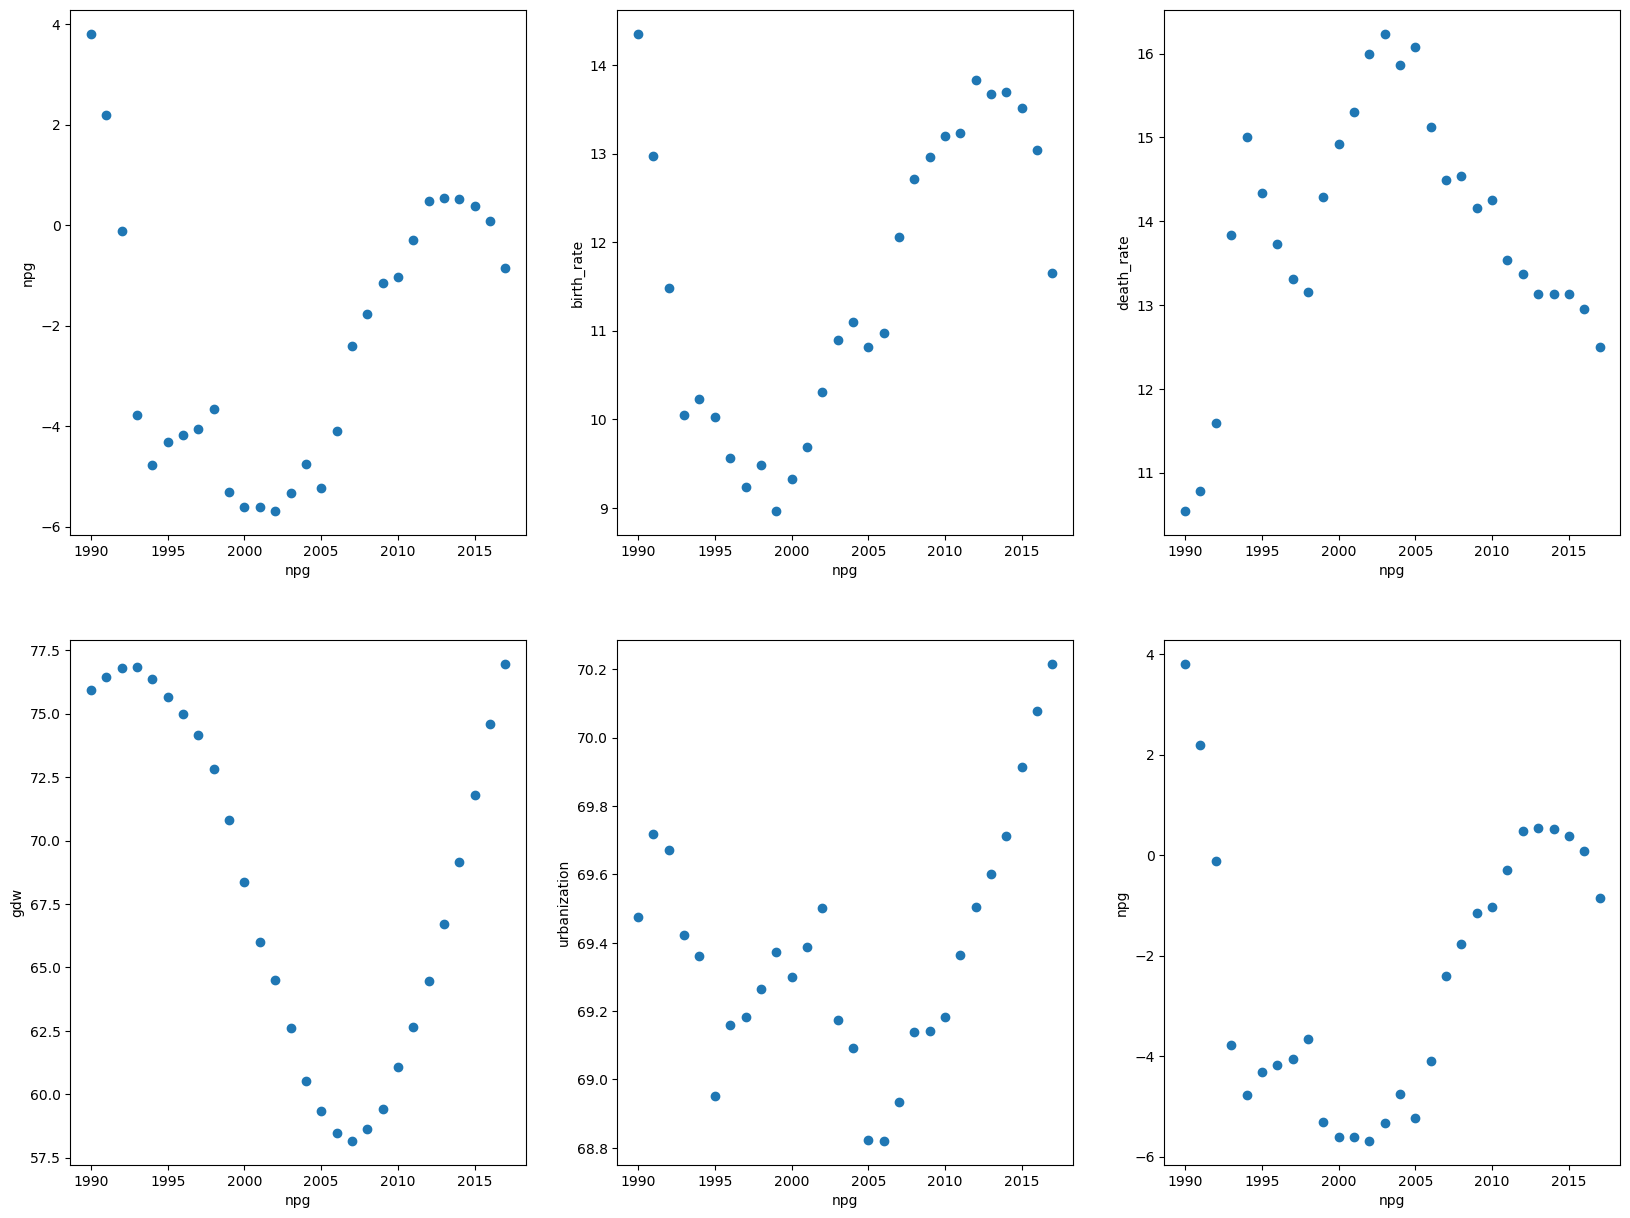

In [184]:
urban_mean = df.groupby(by = 'npg')['urbanization'].mean()
x = list(urban_mean.index.tolist())
y = list(urban_mean.tolist())
plt.scatter(x, y)

rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(20, 15))

col_name = [ 'npg', 'birth_rate', 'death_rate', 'gdw', 'urbanization', 'npg']
count = 0
for i in range(rows):
    for j in range(cols):
        urban_mean = df.groupby(by = 'year')[col_name[count]].mean()
        x = list(urban_mean.index.tolist())
        y = list(urban_mean.tolist())
        axs[i][j].scatter(x, y)
        axs[i][j].set_xlabel('npg')
        axs[i][j].set_ylabel(col_name[count])
        count+=1
    
plt.show()

In [185]:
from sklearn.impute import SimpleImputer
df_urb_npg = df.copy()
df_urb_npg = df_urb_npg.drop(columns = ['year',	'region',	'birth_rate',	'death_rate',	'gdw'])

column_names = df_urb_npg.columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_urb_npg = imputer.fit_transform(df_urb_npg)

df_urb_npg = pd.DataFrame(df_urb_npg, columns=column_names)
df_urb_npg.reset_index(drop=True, inplace=True)

print(df_urb_npg)


      npg  urbanization
0     1.9         52.42
1     1.8         58.07
2     7.6         68.37
3     3.7         73.63
4     4.7         68.01
...   ...           ...
2312 -1.3         62.00
2313  3.7         70.00
2314  6.4         65.50
2315  9.1         83.70
2316 -4.7         81.70

[2317 rows x 2 columns]


In [186]:
# X = df[['year', 'birth_rate', 'death_rate', 'gdw', 'urbanization']].values
X = df_urb_npg.iloc[:, -1].values
y = df_urb_npg.iloc[:, 0].values
X = np.array(df_urb_npg['urbanization'][:]).reshape((-1, 1))
print(X)
print(y)

[[52.42]
 [58.07]
 [68.37]
 ...
 [65.5 ]
 [83.7 ]
 [81.7 ]]
[ 1.9  1.8  7.6 ...  6.4  9.1 -4.7]


In [187]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# X = imputer.fit_transform(X)
# X[np.isnan(X)] = np.nanmean(X)
# y[np.isnan(y)] = np.nanmean(y)
# print(X)
# print(y)
print(len(X), len(y))

2317 2317


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(np.isnan(X_train).any())
print(np.isnan(y_train).any())
print(len(X_train))
print(len(y_train))

False
False
1853
1853


In [189]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred = regressor.predict(X_test)
pd.DataFrame({'True': y_test, 'Predicted': y_pred})

,True,Predicted
0,2.6,1.261380
1,-4.3,-4.114227
2,-2.4,-3.328293
3,9.3,1.473794
4,6.7,-4.510228
...,...,...
459,-8.1,-3.616570
460,-7.0,-3.351052
461,-0.4,-0.938629
462,-2.4,0.011168


In [191]:
regressor = LinearRegression().fit(X, y)
df_urb_npg['predicted'] = regressor.predict(X)
df_urb_npg

,npg,urbanization,predicted
0,1.9,52.42,0.196714
1,1.8,58.07,-0.649932
2,7.6,68.37,-2.193374
3,3.7,73.63,-2.981578
4,4.7,68.01,-2.139428
...,...,...,...
2312,-1.3,62.00,-1.238837
2313,3.7,70.00,-2.437627
2314,6.4,65.50,-1.763308
2315,9.1,83.70,-4.490555


In [192]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # среднее значение абсолютного значения ошибок. 
# (сумма (каждого Actual и Predicted) разделить на количество)

Mean Absolute Error: 4.60025269986027


In [131]:
regressor.coef_

array([-0.14984873])

In [132]:
regressor.intercept_

8.051784344858351

In [193]:
df_urb_npg

,npg,urbanization,predicted
0,1.9,52.42,0.196714
1,1.8,58.07,-0.649932
2,7.6,68.37,-2.193374
3,3.7,73.63,-2.981578
4,4.7,68.01,-2.139428
...,...,...,...
2312,-1.3,62.00,-1.238837
2313,3.7,70.00,-2.437627
2314,6.4,65.50,-1.763308
2315,9.1,83.70,-4.490555


Text(0, 0.5, 'urbanization')

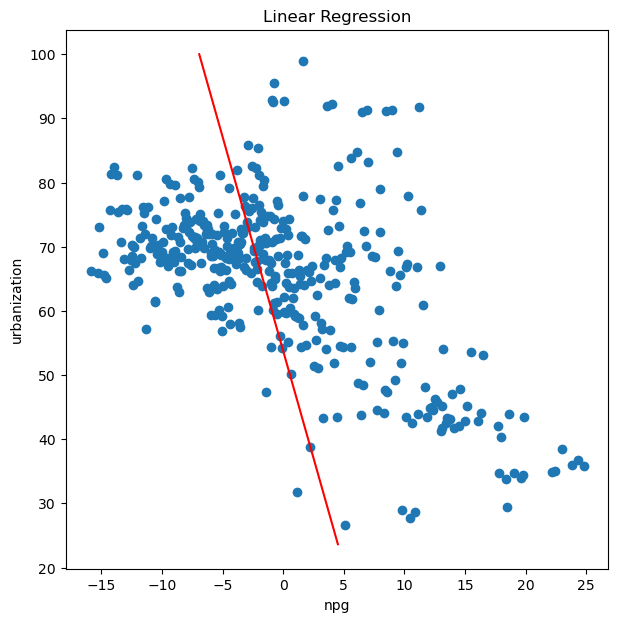

In [195]:
column_names = df_urb_npg.columns

df_urb_npg = pd.DataFrame(df_urb_npg, columns=column_names).sort_values(by = 'predicted')
df_urb_npg.reset_index(drop=True, inplace=True)
df_urb_npg = pd.DataFrame(df_urb_npg.groupby(['urbanization'], as_index=False).median())

plt.figure(figsize=(7, 7))

urban_mean = df_urb_npg.groupby(by = 'npg')['urbanization'].mean()
x = list(urban_mean.index.tolist())
y = list(urban_mean.tolist())
plt.scatter(x, y)

urban_mean = df_urb_npg.groupby(by = 'predicted')['urbanization'].mean()
x = list(urban_mean.index.tolist())
y = list(urban_mean.tolist())
plt.plot(x, y, color = 'red')

plt.title("Linear Regression")
plt.xlabel('npg')
plt.ylabel('urbanization')

In [177]:
new_value = [[]]
print("\nПредсказанный npg: ", regressor.predict([[float(input("\nВведите значение входного параметра " + 'urbanization' + ": "))]]))


Введите значение входного параметра urbanization:  30



Предсказанный npg:  [3.5563223]


In [244]:
df.head(10)

,Actual,Predicted
0,2000,2000.658047
1,1992,1997.019901
2,1996,2008.983049
3,1995,1997.939439
4,2003,2005.509434
5,1996,1999.042453
6,2013,2005.136553
7,1999,1996.839953
8,1996,2000.207523
9,1998,2002.965022
